# 1. Đọc và hiển thị các thông tin từ file covid_19.csv.
- a. In ra danh sách các cột
- b. Loại bỏ các dòng có giá trị bị thiếu (NaN) (các câu hỏi sau sử dụng dữ liệu đã được loại bỏ
giá trị bị thiếu)
- c. In ra số dòng dữ liệu của bảng

In [104]:
import pandas as pd
df = pd.read_csv('covid_19.csv')
df.shape

(49068, 10)

In [105]:
print(df.columns)
df_cleaned_na = df.dropna()
print(f'Số dòng dữ liệu sau khi loại bỏ giá trị thiếu: {len(df_cleaned_na)}')
# c. In ra số dòng dữ liệu của bảng

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')
Số dòng dữ liệu sau khi loại bỏ giá trị thiếu: 14664


# 2. In ra tổng số lượng quốc gia có trong tập dữ liệu

In [106]:
# Sử dụng hàm unique() để lấy danh sách các quốc gia và đếm số lượng
total_countries = len(df_cleaned_na['Country/Region'].unique())
print("Tổng số lượng quốc gia:", total_countries)

Tổng số lượng quốc gia: 8


In [107]:
df_cleaned_na

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific
11,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
49052,Anguilla,United Kingdom,18.2206,-63.0686,2020-07-27,3,0,3,0,Europe
49053,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe
49054,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe
49059,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-07-27,13,0,13,0,Europe


# 3. Xác định và in ra quốc gia có số lượng ca nhiễm cao nhất, số ca tử vong cao nhất và số ca phục hồi cao nhất. (sử dụng hàm idmax)

Số liệu mỗi ngày là cộng dồn nên để so sánh ta phải lấy số liệu là ngày cuối cùng của dataset ở các nước

### 3.1 Trường hợp sử dụng data chưa clean na

In [108]:
# Group the data by date and sum the relevant columns
grouped_df = df.groupby(['Date','Country/Region']).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).reset_index()
sorted_df = grouped_df.sort_values(by=['Date', 'Country/Region']).reset_index(drop=True)
sorted_df.tail(30)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
35126,2020-07-27,Spain,272421,28432,150376,93613
35127,2020-07-27,Sri Lanka,2805,11,2121,673
35128,2020-07-27,Sudan,11424,720,5939,4765
35129,2020-07-27,Suriname,1483,24,925,534
35130,2020-07-27,Sweden,79395,5700,0,73695
35131,2020-07-27,Switzerland,34477,1978,30900,1599
35132,2020-07-27,Syria,674,40,0,634
35133,2020-07-27,Taiwan*,462,7,440,15
35134,2020-07-27,Tajikistan,7235,60,6028,1147
35135,2020-07-27,Tanzania,509,21,183,305


In [109]:
# Lọc dữ liệu cho ngày 27/07/2020
loc_ngay = sorted_df[sorted_df['Date'] == '2020-07-27']

# Tìm quốc gia có số ca nhiễm cao nhất
quoc_gia_nhieu_ca_nhiem_nhat = loc_ngay.loc[loc_ngay['Confirmed'].idxmax()]['Country/Region']
so_ca_nhiem_nhieu_nhat = loc_ngay['Confirmed'].max()

# Tìm quốc gia có số ca tử vong cao nhất
quoc_gia_nhieu_tu_vong_nhat = loc_ngay.loc[loc_ngay['Deaths'].idxmax()]['Country/Region']
so_ca_tu_vong_nhieu_nhat = loc_ngay['Deaths'].max()

# Tìm quốc gia có số ca phục hồi cao nhất
quoc_gia_nhieu_phuc_hoi_nhat = loc_ngay.loc[loc_ngay['Recovered'].idxmax()]['Country/Region']
so_ca_phuc_hoi_nhieu_nhat = loc_ngay['Recovered'].max()

# In kết quả
print(f"Quốc gia có số ca nhiễm cao nhất vào ngày 2020-07-27: {quoc_gia_nhieu_ca_nhiem_nhat} ({so_ca_nhiem_nhieu_nhat} ca nhiễm)")
print(f"Quốc gia có số ca tử vong cao nhất vào ngày 2020-07-27: {quoc_gia_nhieu_tu_vong_nhat} ({so_ca_tu_vong_nhieu_nhat} ca tử vong)")
print(f"Quốc gia có số ca phục hồi cao nhất vào ngày 2020-07-27: {quoc_gia_nhieu_phuc_hoi_nhat} ({so_ca_phuc_hoi_nhieu_nhat} ca phục hồi)")

Quốc gia có số ca nhiễm cao nhất vào ngày 2020-07-27: US (4290259 ca nhiễm)
Quốc gia có số ca tử vong cao nhất vào ngày 2020-07-27: US (148011 ca tử vong)
Quốc gia có số ca phục hồi cao nhất vào ngày 2020-07-27: Brazil (1846641 ca phục hồi)


### 3.2 - Trường hợp sử dụng data đã clean

In [110]:
# Group the data by date and sum the relevant columns
grouped_df_cleaned_na = df_cleaned_na.groupby(['Date','Country/Region']).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).reset_index()
sorted_df_cleaned_na = grouped_df_cleaned_na.sort_values(by=['Date', 'Country/Region']).reset_index(drop=True)
sorted_df_cleaned_na.tail(30)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
1474,2020-07-24,China,86202,4650,78745,2807
1475,2020-07-24,Denmark,191,0,188,3
1476,2020-07-24,France,11379,114,9132,2133
1477,2020-07-24,Greenland,13,0,13,0
1478,2020-07-24,Netherlands,231,19,188,24
1479,2020-07-24,United Kingdom,1586,85,1425,76
1480,2020-07-25,Australia,14403,155,9019,5229
1481,2020-07-25,Canada,115457,8928,0,106529
1482,2020-07-25,China,86381,4652,78813,2916
1483,2020-07-25,Denmark,192,0,188,4


In [111]:
# Lọc dữ liệu cho ngày 27/07/2020
loc_ngay_clean_data = sorted_df_cleaned_na[sorted_df_cleaned_na['Date'] == '2020-07-27']

# Tìm quốc gia có số ca nhiễm cao nhất
quoc_gia_nhieu_ca_nhiem_nhat = loc_ngay_clean_data.loc[loc_ngay_clean_data['Confirmed'].idxmax()]['Country/Region']
so_ca_nhiem_nhieu_nhat = loc_ngay_clean_data['Confirmed'].max()

# Tìm quốc gia có số ca tử vong cao nhất
quoc_gia_nhieu_tu_vong_nhat = loc_ngay_clean_data.loc[loc_ngay_clean_data['Deaths'].idxmax()]['Country/Region']
so_ca_tu_vong_nhieu_nhat = loc_ngay_clean_data['Deaths'].max()

# Tìm quốc gia có số ca phục hồi cao nhất
quoc_gia_nhieu_phuc_hoi_nhat = loc_ngay_clean_data.loc[loc_ngay_clean_data['Recovered'].idxmax()]['Country/Region']
so_ca_phuc_hoi_nhieu_nhat = loc_ngay_clean_data['Recovered'].max()

# In kết quả
print(f"Quốc gia có số ca nhiễm cao nhất vào ngày 2020-07-27: {quoc_gia_nhieu_ca_nhiem_nhat} ({so_ca_nhiem_nhieu_nhat} ca nhiễm)")
print(f"Quốc gia có số ca tử vong cao nhất vào ngày 2020-07-27: {quoc_gia_nhieu_tu_vong_nhat} ({so_ca_tu_vong_nhieu_nhat} ca tử vong)")
print(f"Quốc gia có số ca phục hồi cao nhất vào ngày 2020-07-27: {quoc_gia_nhieu_phuc_hoi_nhat} ({so_ca_phuc_hoi_nhieu_nhat} ca phục hồi)")

Quốc gia có số ca nhiễm cao nhất vào ngày 2020-07-27: Canada (116458 ca nhiễm)
Quốc gia có số ca tử vong cao nhất vào ngày 2020-07-27: Canada (8944 ca tử vong)
Quốc gia có số ca phục hồi cao nhất vào ngày 2020-07-27: China (78869 ca phục hồi)


# 4. In ra tỷ lệ tử vong trung bình (%), tỷ lệ phục hồi trung bình (%) và tỷ lệ ca nhiễm trung bình (%) trên toàn thế giới.
- sửa lại
# 4. In ra số ca tử vong trung bình, số ca phục hồi trung bình và số ca nhiễm trung bình trên toàn thế giới.

### 4.1 Trường hợp sử dụng data đã clean na

In [112]:
# Tính tỷ lệ trung bình
mean_death_cleaned_na = (loc_ngay_clean_data['Deaths'].sum() / 8)
mean_recovery_cleaned_na = (loc_ngay_clean_data['Recovered'].sum() / 8)
mean_infection_clean_na = (loc_ngay_clean_data['Confirmed'].sum() / 8) 

print("Số ca tử vong trung bình: {:.2f}".format(mean_death_cleaned_na))
print("Số ca phục hồi trung bình: {:.2f}".format(mean_recovery_cleaned_na))
print("Số ca nhiễm trung bình: {:.2f}".format(mean_infection_clean_na))

Số ca tử vong trung bình: 1748.38
Số ca phục hồi trung bình: 12465.25
Số ca nhiễm trung bình: 29039.75


### 4.2 Trường hợp sử dụng data chưa clean na
- Số ca tử vong trung bình sẽ là số liệu ngày cuối chia số quốc gia, vì số liệu là cộng dồn chứ không phải từng ngày. Ở đây em sử dụng data không loại bỏ na (vì đa số là thiếu 'Tỉnh')và group các nước lại 

In [113]:
loc_ngay

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
34969,2020-07-27,Afghanistan,36263,1269,25198,9796
34970,2020-07-27,Albania,4880,144,2745,1991
34971,2020-07-27,Algeria,27973,1163,18837,7973
34972,2020-07-27,Andorra,907,52,803,52
34973,2020-07-27,Angola,950,41,242,667
...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791
35152,2020-07-27,Western Sahara,10,1,8,1
35153,2020-07-27,Yemen,1691,483,833,375
35154,2020-07-27,Zambia,4552,140,2815,1597


In [114]:
mean_death = (loc_ngay['Deaths'].sum() / loc_ngay.shape[0])
mean_recovery = (loc_ngay['Recovered'].sum() / loc_ngay.shape[0])
mean_infection = (loc_ngay['Confirmed'].sum() / loc_ngay.shape[0]) 

print("Số ca tử vong trung bình: {:.2f}".format(mean_death))
print("Số ca phục hồi trung bình: {:.2f}".format(mean_recovery))
print("Số ca nhiễm trung bình: {:.2f}".format(mean_infection))

Số ca tử vong trung bình: 3497.52
Số ca phục hồi trung bình: 50631.48
Số ca nhiễm trung bình: 88130.94


# 5. Viết hàm calculate_daily_changes để tính toán số lượng ca nhiễm mới, số lượng ca tử vong và số lượng ca phục hồi mới từ DataFrame vừa lấy được từ file covid_19.csv. Giá trị trả về là một DataFrame mới chứa các cột ObservationDate, NewConfirmed, NewDeaths và NewRecovered, trong đó

In [115]:
def calculate_daily_changes(data):
    data.sort_values(by='Date', inplace=True)
    daily_data = data.groupby('Date').sum().reset_index()
    daily_data['NewConfirmed'] = daily_data['Confirmed'].diff()
    daily_data['NewDeaths'] = daily_data['Deaths'].diff()
    daily_data['NewRecovered'] = daily_data['Recovered'].diff()
    daily_data.dropna(inplace=True)
    daily_data.rename(columns={'Date': 'ObservationDate'}, inplace=True)
    return daily_data[['ObservationDate', 'NewConfirmed', 'NewDeaths', 'NewRecovered']]

daily_changes = calculate_daily_changes(df_cleaned_na)
daily_changes.head()


C:\Users\ngchn\AppData\Local\Temp\ipykernel_10612\3528344991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by='Date', inplace=True)


,ObservationDate,NewConfirmed,NewDeaths,NewRecovered
1,2020-01-23,95.0,1.0,2.0
2,2020-01-24,277.0,8.0,6.0
3,2020-01-25,486.0,16.0,3.0
4,2020-01-26,674.0,14.0,10.0
5,2020-01-27,803.0,26.0,9.0


# 6. Tạo một DataFrame mới chỉ chứa các hàng có Country/Region là “Vietnam”

In [116]:
vietnam_data = df[df['Country/Region'] == 'Vietnam']
print("Dữ liệu Covid_19 của Việt Nam")
vietnam_data


Dữ liệu Covid_19 của Việt Nam


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
226,NaN,Vietnam,14.058324,108.277199,2020-01-22,0,0,0,0,Western Pacific
487,NaN,Vietnam,14.058324,108.277199,2020-01-23,2,0,0,2,Western Pacific
748,NaN,Vietnam,14.058324,108.277199,2020-01-24,2,0,0,2,Western Pacific
1009,NaN,Vietnam,14.058324,108.277199,2020-01-25,2,0,0,2,Western Pacific
1270,NaN,Vietnam,14.058324,108.277199,2020-01-26,2,0,0,2,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47989,NaN,Vietnam,14.058324,108.277199,2020-07-23,412,0,365,47,Western Pacific
48250,NaN,Vietnam,14.058324,108.277199,2020-07-24,415,0,365,50,Western Pacific
48511,NaN,Vietnam,14.058324,108.277199,2020-07-25,417,0,365,52,Western Pacific
48772,NaN,Vietnam,14.058324,108.277199,2020-07-26,420,0,365,55,Western Pacific


In [117]:
vietnam_data['Deaths'].unique()

array([0], dtype=int64)

# 7. Từ DataFrame trên, thêm cột (Info01) cho biết số ca nhiễm mới (Confimed) mỗi ngày là tăng (giá trị 1), giảm (giá trị -1), bằng (giá trị 0) so với số ca nhiễm trước đó.

In [118]:
def add_info_column(df):
    df_sorted = df.sort_values(by='ObservationDate').reset_index(drop=True)
    df_sorted['Info01'] = df_sorted['NewConfirmed'].diff().fillna(0).apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    
    return df_sorted

In [119]:
def calculate_daily_changes_active(data):
    data.sort_values(by='Date', inplace=True)
    daily_data = data.groupby('Date').sum().reset_index()
    daily_data['NewConfirmed'] = daily_data['Confirmed'].diff()
    daily_data['NewDeaths'] = daily_data['Deaths'].diff()
    daily_data['NewRecovered'] = daily_data['Recovered'].diff()
    daily_data['NewActive']=daily_data['Active'].diff()
    daily_data.dropna(inplace=True)
    daily_data.rename(columns={'Date': 'ObservationDate'}, inplace=True)
    return daily_data[['ObservationDate', 'NewConfirmed', 'NewDeaths', 'NewRecovered','NewActive']]


In [120]:
# Tính toán số lượng ca mới mỗi ngày
df_daily_changes_vn = calculate_daily_changes(vietnam_data)
df_daily_changes_vn

C:\Users\ngchn\AppData\Local\Temp\ipykernel_10612\3528344991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by='Date', inplace=True)


,ObservationDate,NewConfirmed,NewDeaths,NewRecovered
1,2020-01-23,2.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
5,2020-01-27,0.0,0.0,0.0
...,...,...,...,...
183,2020-07-23,4.0,0.0,0.0
184,2020-07-24,3.0,0.0,0.0
185,2020-07-25,2.0,0.0,0.0
186,2020-07-26,3.0,0.0,0.0


In [121]:
df_with_info01 = add_info_column(df_daily_changes_vn)
df_with_info01

,ObservationDate,NewConfirmed,NewDeaths,NewRecovered,Info01
0,2020-01-23,2.0,0.0,0.0,0
1,2020-01-24,0.0,0.0,0.0,-1
2,2020-01-25,0.0,0.0,0.0,0
3,2020-01-26,0.0,0.0,0.0,0
4,2020-01-27,0.0,0.0,0.0,0
...,...,...,...,...,...
182,2020-07-23,4.0,0.0,0.0,-1
183,2020-07-24,3.0,0.0,0.0,-1
184,2020-07-25,2.0,0.0,0.0,-1
185,2020-07-26,3.0,0.0,0.0,1


# 8. Vẽ biểu đồ đường thể hiện sự thay đổi số ca nhiễm mới hàng ngày ở Việt Nam trong khoảng thời gian từ tháng 1 đến tháng 7 năm 2020.

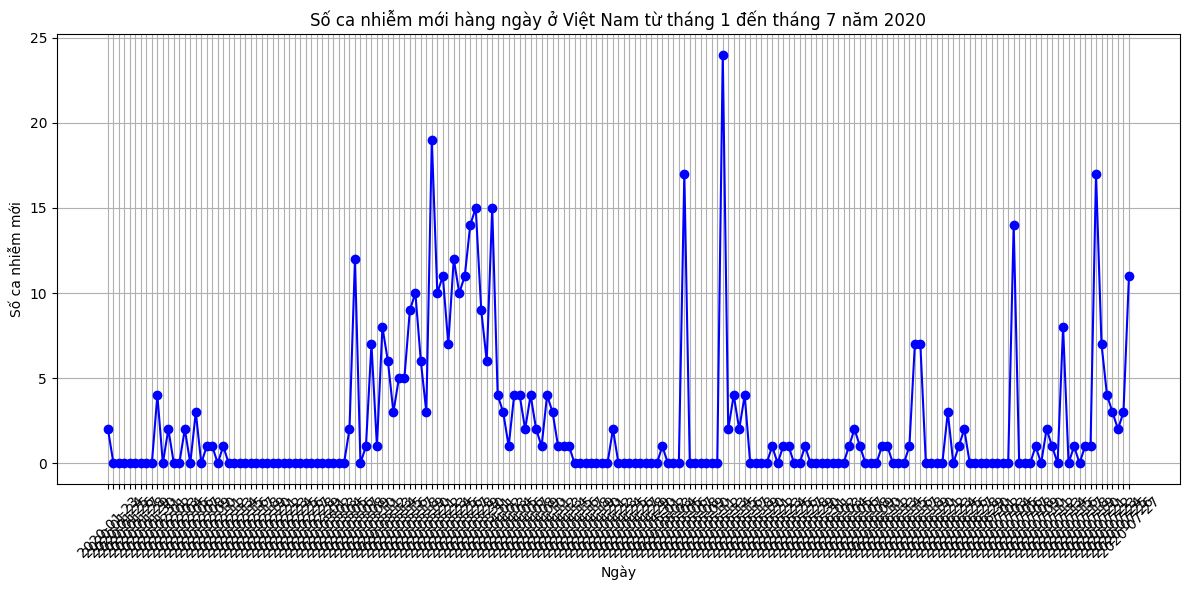

In [122]:
import matplotlib.pyplot as plt
# Lọc dữ liệu từ tháng 1 đến tháng 7 năm 2020
df_vietnam = df_with_info01[(df_with_info01['ObservationDate'] >= '2020-01-01') & (df_with_info01['ObservationDate'] <= '2020-07-31')]

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 6))
plt.plot(df_vietnam['ObservationDate'], df_vietnam['NewConfirmed'], marker='o', linestyle='-', color='b')
plt.title('Số ca nhiễm mới hàng ngày ở Việt Nam từ tháng 1 đến tháng 7 năm 2020')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Xây dựng mô hình hồi quy tuyến tính để dự đoán số ca nhiễm COVID_19 dựa trên dữ liệu đọc từ file covide_19.

Bởi vì số ca nhiễm không chia theo quốc gia mà trên toàn thế giới nên data sẽ group theo ngày, bỏ các cột không phải giá trị số và thêm cột tổng số ca nhiễm của ngày trước đó

In [123]:
# Tính toán số lượng ca mới mỗi ngày
df_daily_changes = calculate_daily_changes_active(df)
df_daily_changes

,ObservationDate,NewConfirmed,NewDeaths,NewRecovered,NewActive
1,2020-01-23,99.0,1.0,2.0,96.0
2,2020-01-24,287.0,8.0,6.0,273.0
3,2020-01-25,493.0,16.0,3.0,474.0
4,2020-01-26,684.0,14.0,13.0,657.0
5,2020-01-27,809.0,26.0,9.0,774.0
...,...,...,...,...,...
183,2020-07-23,282756.0,9966.0,169714.0,103076.0
184,2020-07-24,281164.0,6144.0,228736.0,46284.0
185,2020-07-25,255545.0,4867.0,219038.0,31640.0
186,2020-07-26,204606.0,4104.0,134721.0,65781.0


In [124]:
df_daily_changes['Previous_Confirmed'] = df_daily_changes['NewConfirmed'].shift(1)
df_daily_changes

,ObservationDate,NewConfirmed,NewDeaths,NewRecovered,NewActive,Previous_Confirmed
1,2020-01-23,99.0,1.0,2.0,96.0,NaN
2,2020-01-24,287.0,8.0,6.0,273.0,99.0
3,2020-01-25,493.0,16.0,3.0,474.0,287.0
4,2020-01-26,684.0,14.0,13.0,657.0,493.0
5,2020-01-27,809.0,26.0,9.0,774.0,684.0
...,...,...,...,...,...,...
183,2020-07-23,282756.0,9966.0,169714.0,103076.0,280647.0
184,2020-07-24,281164.0,6144.0,228736.0,46284.0,282756.0
185,2020-07-25,255545.0,4867.0,219038.0,31640.0,281164.0
186,2020-07-26,204606.0,4104.0,134721.0,65781.0,255545.0


Ngày đầu thì Previous_Confirmed sẽ là 0

In [125]:
df_daily_changes.at[1, 'Previous_Confirmed'] = 0
df_daily_changes

,ObservationDate,NewConfirmed,NewDeaths,NewRecovered,NewActive,Previous_Confirmed
1,2020-01-23,99.0,1.0,2.0,96.0,0.0
2,2020-01-24,287.0,8.0,6.0,273.0,99.0
3,2020-01-25,493.0,16.0,3.0,474.0,287.0
4,2020-01-26,684.0,14.0,13.0,657.0,493.0
5,2020-01-27,809.0,26.0,9.0,774.0,684.0
...,...,...,...,...,...,...
183,2020-07-23,282756.0,9966.0,169714.0,103076.0,280647.0
184,2020-07-24,281164.0,6144.0,228736.0,46284.0,282756.0
185,2020-07-25,255545.0,4867.0,219038.0,31640.0,281164.0
186,2020-07-26,204606.0,4104.0,134721.0,65781.0,255545.0


In [126]:
df_daily_changes.isna().sum()

ObservationDate       0
NewConfirmed          0
NewDeaths             0
NewRecovered          0
NewActive             0
Previous_Confirmed    0
dtype: int64

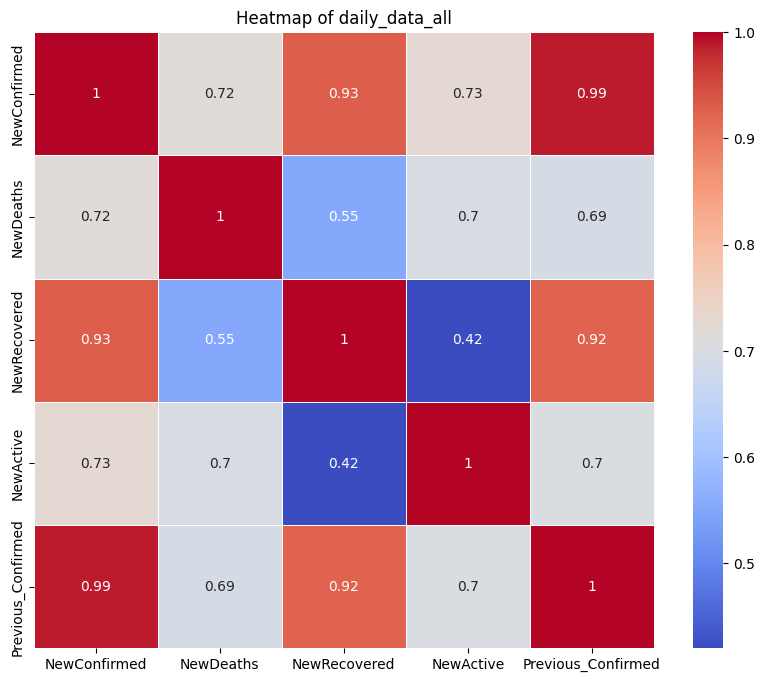

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
daily_changes_without_date = df_daily_changes.drop(columns=['ObservationDate'])
plt.figure(figsize=(10, 8))
sns.heatmap(daily_changes_without_date.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of daily_data_all')
plt.show()

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = daily_changes_without_date[['Previous_Confirmed', 'NewActive', 'NewRecovered','NewDeaths']]
y = daily_changes_without_date['NewConfirmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# In hệ số hồi quy và hệ số chặn
print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 6.497993489598307e-21
Coefficient: 1.0001243640076232e-15
Intercept: -1.0186340659856796e-10


In [130]:
# Tạo DataFrame hiển thị kết quả dự đoán và thực tế
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# In ra 10 trường hợp
print(comparison_df.head(10))

       Actual  Predicted
186  204606.0   204606.0
79    87658.0    87658.0
56    19586.0    19586.0
138  102225.0   102225.0
162  207705.0   207705.0
16     3532.0     3532.0
76    76873.0    76873.0
155  177887.0   177887.0
123   95326.0    95326.0
176  252541.0   252541.0
